# Homework 7

name : ____

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
from collections import deque
from pylab import rcParams

In [2]:
class PriorityQueue():
    '''
    The arguments passed to a PriorityQueue must consist of
    objects than can be compared using <.
    Use a tuple (priority, item) if necessary.
    '''

    def __init__(self):
        self._pq = []

    def _parent(self,n):
        return (n-1)//2

    def _leftchild(self,n):
        return 2*n + 1

    def _rightchild(self,n):
        return 2*n + 2

    def push(self, obj):
        # append at end and bubble up
        self._pq.append( obj )
        n = len(self._pq)
        self._bubble_up(n-1)

    def _bubble_up(self, index):
        while index>0:
            cur_item = self._pq[index]
            parent_idx = self._parent(index)
            parent_item = self._pq[parent_idx]
            
            if cur_item < parent_item:
                # swap with parent
                self._pq[parent_idx] = cur_item
                self._pq[index] = parent_item
                index = parent_idx
            else:
                break

    def pop(self):
        n = len(self._pq)
        if n==0:
            return None
        if n==1:
            return self._pq.pop()
        
        # replace with last item and sift down:
        obj = self._pq[0]
        self._pq[0] = self._pq.pop()
        self._sift_down(0)
        return obj

    def heapify(self, items):
        self._pq = items
        index = self._parent(len(self._pq)-1)
        
        while index >=0:
            self._sift_down(index)
            index -= 1
    
    def _sift_down(self,index):
        n = len(self._pq)
        
        while index<n:           
            cur_item = self._pq[index]
            lc = self._leftchild(index)
            if n <= lc:
                break

            # first set small child to left child:
            small_child_item = self._pq[lc]
            small_child_idx = lc
            
            # right exists and is smaller?
            rc = self._rightchild(index)
            if rc < n:
                r_item = self._pq[rc]
                if r_item < small_child_item:
                    # right child is smaller than left child:
                    small_child_item = r_item
                    small_child_idx = rc
            
            # done: we are smaller than both children:
            if cur_item <= small_child_item:
                break
            
            # swap with smallest child:
            self._pq[index] = small_child_item
            self._pq[small_child_idx] = cur_item
            
            # continue with smallest child:
            index = small_child_idx
        
    def size(self):
        return len(self._pq)
    
    def is_empty(self):
        return len(self._pq) == 0
    
    def show(self):
        k=1
        for i in range(0,len(self._pq)):
            if i==k:
                print()
                k=k*2+1
            print(self._pq[i], "")
        print()
        
    def decrease_priority(self, old, new):
        assert(new <= old)
        
        for i in range(0,len(self._pq)):
            if self._pq[i] == old:
                self._pq[i] = new
                self._bubble_up(i)
                return
        assert(False)
        

In [3]:
class Graph(object):
    '''Represents a graph'''

    def __init__(self, vertices, edges):
        '''A Graph is defined by its set of vertices
           and its set of edges.'''
        self.V = set(vertices) # The set of vertices
        self.E = set([])       # The set of edges
        self.neighbors = {}          # A dictionary that will hold the list
                               # of adjacent vertices for each vertex.
        self.vertex_coordinates = {}       # An optional dictionary that can hold coordinates
                               # for the vertices.
        self.edge_labels = {}  # a dictionary of labels for edges

        self.add_edges(edges)  # Note the call to add_edges will also
                               # update the neighbors dictionary
        print ('(Initializing a graph with %d vertices and %d edges)' % (len(self.V),len(self.E)))


    def add_vertices(self,vertex_list):
        ''' This method will add the vertices in the vertex_list
            to the set of vertices for this graph. Since V is a
            set, duplicate vertices will not be added to V. '''
        for v in vertex_list:
            self.V.add(v)
        self.build_neighbors()


    def add_edges(self,edge_list):
        ''' This method will add a list of edges to the graph
            It will insure that the vertices of each edge are
            included in the set of vertices (and not duplicated).
            It will also insure that edges are added to the
            list of edges and not duplicated. '''
        for s,t in edge_list:
            if (s,t) not in self.E and (t,s) not in self.E:
                self.V.add(s)
                self.V.add(t)
                self.E.add((s,t))
        self.build_neighbors()


    def build_neighbors(self):
        self.neighbors = {}
        for v in self.V:
            self.neighbors[v] = []
        for e in self.E:
            s,t = e
            self.neighbors[s].append(t)
            self.neighbors[t].append(s)


    def degree_of(self, vertex):
        """ return the degree of the given vertex """
        if vertex in self.V:
            return len(self.neighbors[vertex])
        else:
            return None


    def get_a_vertex(self):
        """ returns some vertex of the graph """
        if 0 < len(self.V):
            v = self.V.pop()
            self.V.add(v)
            return v
        else:
            return None


    def plot(self):
        nV = len(self.V)
        if len(self.vertex_coordinates) != nV:
            # Coordinates have not been specified for every vertex
            dTheta = 2*math.pi/nV
            k = 0
            for v in self.V:
                self.vertex_coordinates[v] = (10*math.cos(math.pi/2-k*dTheta),10*math.sin(math.pi/2-k*dTheta))
                k += 1
        px = []
        py = []
        for v in self.V:
            px.append(self.vertex_coordinates[v][0])
            py.append(self.vertex_coordinates[v][1])
        plt.plot(px,py,'bo',hold=True)
        for vertex in self.V:
            p = self.vertex_coordinates[vertex]
            pq = max(0.1,math.sqrt(p[0]**2 + p[1]**2))
            rx = p[0]/pq
            ry = p[1]/pq
            plt.text(p[0]+0.2*rx, p[1]+0.2*ry, str(vertex))
        for s,t in self.E:
            plt.plot([self.vertex_coordinates[s][0], self.vertex_coordinates[t][0]],
                     [self.vertex_coordinates[s][1], self.vertex_coordinates[t][1]],
                     'b',hold=True)
            if (s,t) in self.edge_labels:
                label = self.edge_labels[(s,t)]
                plt.text((self.vertex_coordinates[s][0]+self.vertex_coordinates[t][0])/2-0.1,
                         (self.vertex_coordinates[s][1]+self.vertex_coordinates[t][1])/2-0.1, label)
        plt.xlim(min(px)-1.0, max(px)+1.1)
        plt.ylim(min(py)-1.0, max(py)+1.1)

    def get_a_component_spanning_tree(self, root):
        """ This routine uses a breadth-first search
        to obtain a tree that spans the component
        containing root """
        spanning_tree = []
        visited = {}
        for v in self.V:
            visited[v] = False
        Q = deque()
        visited[root] = True
        Q.append(root)
        while 0 < len(Q):
            v = Q.popleft()
            for u in self.neighbors[v]:
                if not visited[u]:
                    visited[u] = True
                    Q.append(u)
                    spanning_tree.append((v,u))
        return spanning_tree


    def is_connected(self):
        """ If the graph is connected then if the tree
        returned by get_a_component_spanning_tree has
        nV-1 edges - that is, it spans the graph."""
        root = self.get_a_vertex()
        tree = self.get_a_component_spanning_tree(root)
        if len(tree) == len(self.V)-1:
            return True
        else:
            return False

In [4]:
class Network(Graph):    
    def __init__(self, vertices, edge_weights):
        ''' Initialize the network with a list of vertices
        and weights (a dictionary with keys (E1, E2) and values are the weights)'''

        edges = []
        for e1,e2 in edge_weights:
            edges.append((e1,e2))
        
        Graph.__init__(self, vertices, edges)
        self.weights = {}
        for e1,e2 in edge_weights:
            weight = edge_weights[(e1,e2)]
            self.weights[(e1,e2)] = weight
            self.weights[(e2,e1)] = weight
        self.edge_labels = self.weights


(Initializing a graph with 5 vertices and 7 edges)


AttributeError: 'Line2D' object has no property 'hold'

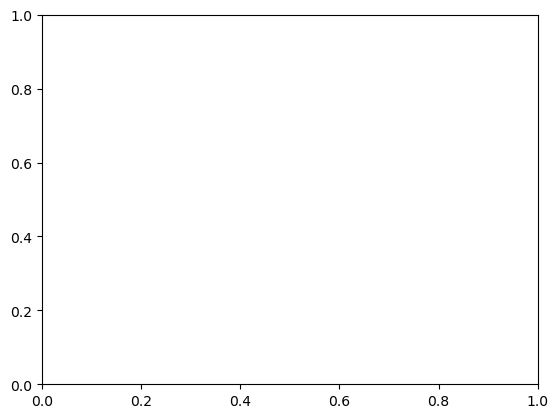

In [6]:
V = ['A', 'B', 'C', 'D', 'E']
W = {('A','C'):3, ('A','B'):6, ('A','D'):7, ('B','C'):1, ('B','D'):2, ('C','E'):10, ('B','E'):4}
G1 = Network(V,W)
G1.vertex_coordinates = {'A':(1,0),'C':(3,5),'B':(4,0),'D':(4,-5),'E':(7,0)}
G1.plot()
print (G1.weights)

print (G1.V)


In [7]:
def dijkstra_version1(network, source):
    dist = {source:0}
    prev = {}
    done = {}
    pq = PriorityQueue()
    pq.push((0,source))
    
    while not pq.is_empty():
        dist_u, u = pq.pop()
        if u in done:
            continue
        done[u] = True
        
        for v in network.neighbors[u]:
            new_dist_to_v = dist_u + network.weights[(u,v)]
            if not v in dist or dist[v]>new_dist_to_v:
                dist[v] = new_dist_to_v
                prev[v] = u
                pq.push((new_dist_to_v, v))
                
                
    return dist, prev
            
dist, prev = dijkstra_version1(G1,'A')           
print ("distance:", dist)
print ("prev:", prev)
        
    
    

distance: {'A': 0, 'C': 3, 'D': 6, 'B': 4, 'E': 8}
prev: {'C': 'A', 'D': 'B', 'B': 'C', 'E': 'B'}


In [8]:
def dijkstra_version2(network, source):
    dist = {source:0}
    l = []
    l.append((0,source))
    
    for v in network.V:
        if v!= source:
            dist[v] = ('inf')
            l.append((dist[v],v))
    #for v in dist:
    #    if v!= source:
    #        l.append((dist[v],v))
        
    prev = {}
    done = {}
    pq = PriorityQueue()
    pq.heapify(l)
    
    while not pq.is_empty():
        dist_u, u = pq.pop()
        if u in done:
            continue
        done[u] = True
        
        for v in network.neighbors[u]:
            new_dist_to_v = dist_u + network.weights[(u,v)]
            if dist[v]>new_dist_to_v:
                k = dist[v]
                dist[v] = new_dist_to_v
                prev[v] = u
                pq.decrease_priority((k,v),(new_dist_to_v, v))
                
                
    return dist, prev
            
dist, prev = dijkstra_version2(G1,'A')           
print ("distance:", dist)
print ("prev:", prev)
        

TypeError: '<=' not supported between instances of 'int' and 'str'

['Atlanta, GA', 'Augusta, GA', 'Tifton, GA', 'Montgomery, AL', 'Birmingham, AL', 'Chattanooga, TN', 'Savannah, GA', 'Columbia, SC', 'Charlotte, NC', 'Asheville, NC', 'Knoxville, TN', 'Charleston, SC', 'Jacksonville, FL', 'Tallahassee, FL', 'Mobile, AL', 'Meridian, MS', 'Columbus, MS', 'Huntsville, AL', 'Corinth, MS', 'Memphis, TN', 'Nashville, TN', 'Florence, SC', 'Raleigh, NC', 'Bluefield, WV', 'Greensboro, NC', 'Wilmington, NC', 'Roanoke, VA', 'Charleston, WV', 'Lexington, KY', 'Myrtle_Beach, SC', 'Daytona_Beach, FL', 'Gainsville, FL']
(Initializing a graph with 32 vertices and 67 edges)
{'Charlotte, NC': (35.22, 80.93), 'Raleigh, NC': (35.7719, 78.6389), 'Florence, SC': (34.1953, 79.7628), 'Meridian, MS': (32.333, 88.75), 'Chattanooga, TN': (35.033, 85.2), 'Augusta, GA': (33.28, 82.02), 'Myrtle_Beach, SC': (33.68, 78.93), 'Corinth, MS': (34.9314, 88.5235), 'Tifton, GA': (31.27, 83.31), 'Knoxville, TN': (35.82, 83.98), 'Tallahassee, FL': (30.383, 84.367), 'Roanoke, VA': (37.317, 79.9

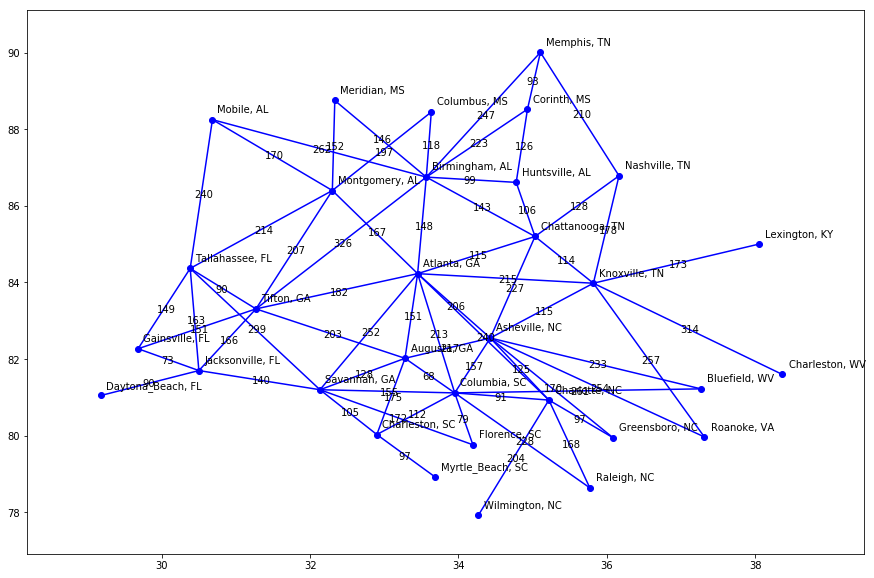

In [10]:
# Index   City          State   Latitude    Longitude
southeast_cities = """
       1  Atlanta       GA       33.4500      84.2300
       2  Augusta       GA       33.2800      82.0200
       3  Tifton        GA       31.2700      83.3100
       4  Montgomery    AL       32.3000      86.4000
       5  Birmingham    AL       33.5670      86.7500
       6  Chattanooga   TN       35.0330      85.2000
       7  Savannah      GA       32.1330      81.2000
       8  Columbia      SC       33.9500      81.1170
       9  Charlotte     NC       35.2200      80.9300
      10  Asheville     NC       34.4300      82.5500
      11  Knoxville     TN       35.8200      83.9800
      12  Charleston    SC       32.9000      80.0300
      13  Jacksonville  FL       30.5000      81.7000
      14  Tallahassee   FL       30.3830      84.3670
      15  Mobile        AL       30.6830      88.2500
      16  Meridian      MS       32.3330      88.7500
      17  Columbus      MS       33.6345      88.4498
      18  Huntsville    AL       34.7793      86.6124
      19  Corinth       MS       34.9314      88.5235
      20  Memphis       TN       35.1056      90.0070
      21  Nashville     TN       36.1658      86.7844
      22  Florence      SC       34.1953      79.7628
      23  Raleigh       NC       35.7719      78.6389
      24  Bluefield     WV       37.2697      81.2225
      25  Greensboro    NC       36.0830      79.9500
      26  Wilmington    NC       34.2670      77.9170
      27  Roanoke       VA       37.3170      79.9670
      28  Charleston    WV       38.3670      81.6000
      29  Lexington     KY       38.0500      85.0000
      30  Myrtle_Beach  SC       33.6800      78.9300
      31  Daytona_Beach FL       29.1800      81.0500
      32  Gainsville    FL       29.6800      82.2700
"""
# Edge List (source target distance)
road_map = """
   Atlanta       GA    Augusta       GA    151
   Atlanta       GA    Tifton        GA    182
   Atlanta       GA    Montgomery    AL    167
   Atlanta       GA    Birmingham    AL    148
   Atlanta       GA    Chattanooga   TN    115
   Atlanta       GA    Savannah      GA    252
   Atlanta       GA    Columbia      SC    213
   Atlanta       GA    Charlotte     NC    240
   Atlanta       GA    Asheville     NC    206
   Atlanta       GA    Knoxville     TN    215
   Augusta       GA    Tifton        GA    203
   Augusta       GA    Savannah      GA    128
   Augusta       GA    Columbia      SC     68
   Augusta       GA    Asheville     NC    217
   Augusta       GA    Charleston    SC    175
   Tifton        GA    Montgomery    AL    207
   Tifton        GA    Birmingham    AL    326
   Tifton        GA    Jacksonville  FL    166
   Tifton        GA    Tallahassee   FL     90
   Tifton        GA    Gainsville    FL    151
   Montgomery    AL    Tallahassee   FL    214
   Montgomery    AL    Mobile        AL    170
   Montgomery    AL    Meridian      MS    152
   Montgomery    AL    Columbus      MS    197
   Birmingham    AL    Chattanooga   TN    143
   Birmingham    AL    Mobile        AL    262
   Birmingham    AL    Meridian      MS    146
   Birmingham    AL    Columbus      MS    118
   Birmingham    AL    Huntsville    AL     99
   Birmingham    AL    Corinth       MS    223
   Birmingham    AL    Memphis       TN    247
   Chattanooga   TN    Asheville     NC    227
   Chattanooga   TN    Knoxville     TN    114
   Chattanooga   TN    Huntsville    AL    106
   Chattanooga   TN    Nashville     TN    128
   Savannah      GA    Columbia      SC    155
   Savannah      GA    Charleston    SC    105
   Savannah      GA    Jacksonville  FL    140
   Savannah      GA    Tallahassee   FL    299
   Savannah      GA    Florence      SC    172
   Columbia      SC    Charlotte     NC     91
   Columbia      SC    Asheville     NC    157
   Columbia      SC    Charleston    SC    112
   Columbia      SC    Florence      SC     79
   Columbia      SC    Raleigh       NC    228
   Columbia      SC    Bluefield     WV    261
   Charlotte     NC    Asheville     NC    125
   Charlotte     NC    Raleigh       NC    168
   Charlotte     NC    Greensboro    NC     97
   Charlotte     NC    Wilmington    NC    204
   Asheville     NC    Knoxville     TN    115
   Asheville     NC    Bluefield     WV    233
   Asheville     NC    Greensboro    NC    170
   Asheville     NC    Roanoke       VA    254
   Knoxville     TN    Nashville     TN    178
   Knoxville     TN    Roanoke       VA    257
   Knoxville     TN    Charleston    WV    314
   Knoxville     TN    Lexington     KY    173
   Charleston    SC    Myrtle_Beach  SC     97
   Jacksonville  FL    Tallahassee   FL    163
   Jacksonville  FL    Daytona_Beach FL     90
   Jacksonville  FL    Gainsville    FL     73
   Tallahassee   FL    Mobile        AL    240
   Tallahassee   FL    Gainsville    FL    149
   Huntsville    AL    Corinth       MS    126
   Corinth       MS    Memphis       TN     93
   Memphis       TN    Nashville     TN    210
"""
import re
# Build the vertex_list and the vcoords

p = re.compile(r'\s+(\d+)\s+(\w+)\s+(\w+)\s+(\d+\.\d+)\s+(\d+\.\d+)')

vertex_list = []
vcoords = {}
pos = 0
while pos<len(southeast_cities):
    m = p.search(southeast_cities,pos)
    if m:
        #print m.group()
        g = m.groups()
        if g[0] and g[1] and g[2] and g[3] and g[4]:
            city = g[1]+', '+g[2]
            vertex_list.append(city)
            coord = (float(g[3]),float(g[4]))
            vcoords[city] = coord
        pos = m.end()
    else:
        break
print (vertex_list)
# print vcoords

# Build the edge_list and the list of weights

q = re.compile(r'\s+(\w+)\s+(\w+)\s+(\w+)\s+(\w+)\s+(\d+)')

edge_list = []
weights = {}
pos = 0
while pos<len(road_map):
    m = q.search(road_map,pos)
    if m:
        # print m.group()
        g = m.groups()
        if g[0] and g[1] and g[2] and g[3] and g[4]:
            s = g[0]+', '+g[1]
            t = g[2]+', '+g[3]
            w = int(g[4])
            weights[(s,t)]=w
        pos = m.end()
    else:
        break
        
Atlas = Network(vertex_list, weights)
Atlas.vertex_coordinates = vcoords
rcParams['figure.figsize'] = (15,10)
Atlas.plot()
print (vcoords)

In [24]:
import timeit
start = timeit.default_timer()
dist, prev = dijkstra_version1(Atlas,'Daytona_Beach, FL') 
print timeit.default_timer() - start
start = timeit.default_timer()
dist2,prev2 = dijkstra_version2(Atlas,'Daytona_Beach, FL')
print timeit.default_timer() - start


0.00101184844971
0.00162720680237


## Question 2

implement a more efficient version of dijkstra that uses
1) heapify() to push all edges, 2) use decrease_priority()

In [ ]:
def dijkstra_version2(network, source):
    pass
            
dist, prev = dijkstra_version2(G1,'A')           
print ("distance:", dist)
print ("prev:", prev)
        

In [16]:
pq = PriorityQueue()
pq.push(5)
pq.push(3)
pq.push(2)
pq.show()

(2, '')
()
(5, '')
(3, '')
()
